In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

import sklearn
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import tree

import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [193]:
df_master = pd.read_csv("master_12-05.csv", index_col=0)
df_master.describe()


,FIPS,year,CDC Week,Count,Disease_INFLUENZA_A,Disease_INFLUENZA_B,Disease_INFLUENZA_UNSPECIFIED,flu,fluSymptoms,fever,cough,soreThroat,Target,VaxRate,PRCP,SNOW,TAVG,TMAX,TMIN,SNOWDepth
count,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,19956.000000,9540.000000,18462.000000,15685.000000,18187.000000,18192.000000,18188.000000,15062.000000
mean,36063.424900,2014.174402,24.816434,26.010458,20.003088,5.811604,0.195767,0.026605,0.020833,0.287768,0.256351,0.260344,26.124424,0.555987,0.131613,0.486394,38.083467,46.986435,29.187038,2.208371
std,35.586314,2.992755,18.086529,88.217416,68.727437,29.215823,1.604029,0.090495,0.079796,0.149518,0.178057,0.168710,88.469715,0.089235,0.136317,1.070909,13.208433,14.038245,12.852083,4.444374
min,36001.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337000,0.000000,0.000000,-5.785714,6.375000,-23.142857,0.000000
25%,36033.000000,2012.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.002475,0.001258,0.204321,0.139920,0.140832,0.000000,0.520000,0.035714,0.000000,28.500000,36.142857,20.714286,0.000000
50%,36065.000000,2014.000000,17.000000,2.000000,1.000000,0.000000,0.000000,0.005558,0.002965,0.271068,0.221400,0.247043,2.000000,0.591000,0.098571,0.000000,37.928571,46.285714,29.500000,0.000000
75%,36095.000000,2017.000000,44.000000,14.000000,10.000000,2.000000,0.000000,0.013376,0.008617,0.355073,0.332691,0.364779,15.000000,0.620000,0.185536,0.500000,48.428571,58.142857,38.428571,2.333333
max,36123.000000,2019.000000,53.000000,2401.000000,1213.000000,1166.000000,92.000000,1.000000,0.915000,1.244567,1.245430,1.016013,2401.000000,0.721000,2.820000,15.000000,70.750000,86.000000,67.000000,38.285714


Features to consider

In [215]:
#List of all the features to consider including target variable
columns = ['year','CDC Week','Week Ending Date','Count','PRCP','TAVG','Target', 'SNOWDepth', 'UnempRate','GDP', 'Population','VaxRate', 'flu', 'fluSymptoms','fever','cough', 'soreThroat']
features_withTarget = ['year','CDC Week','Count','PRCP','TAVG', 'SNOWDepth', 'UnempRate','GDP', 'Population','VaxRate', 'Target', 'flu', 'fluSymptoms','fever','cough', 'soreThroat']
target_variable = 'Target'
features = features_withTarget.copy()
features.remove(target_variable)
print("columns = ", columns)
print("features = ",features )
print("target_variable = ",target_variable )
df_master_modified = df_master[columns]


for column in df_master_modified.columns:
  if column != 'Week Ending Date':
    df_master_modified[column] = pd.to_numeric(df_master_modified[column],errors='coerce')
print("Shape of dataframe = ", df_master_modified.shape)


columns =  ['year', 'CDC Week', 'Week Ending Date', 'Count', 'PRCP', 'TAVG', 'Target', 'SNOWDepth', 'UnempRate', 'GDP', 'Population', 'VaxRate', 'flu', 'fluSymptoms', 'fever', 'cough', 'soreThroat']
features =  ['year', 'CDC Week', 'Count', 'PRCP', 'TAVG', 'SNOWDepth', 'UnempRate', 'GDP', 'Population', 'VaxRate', 'flu', 'fluSymptoms', 'fever', 'cough', 'soreThroat']
target_variable =  Target
Shape of dataframe =  (20080, 17)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Handling missing data

In [216]:
def missing_data_handle(dataframe, method = "drop"):
  if method == "drop":
    dataframe_updated = dataframe.dropna()
    #dataframe_updated = dataframe_updated.drop(columns = ['Week Ending Date'])
    return dataframe_updated
  elif method == "avg_over_month":
    #print("nans before averaging over month = ", dataframe.isna().sum())
    dataframe['Date'] = pd.to_datetime(dataframe['Week Ending Date'])
    dataframe_updated = dataframe.fillna(dataframe.groupby(dataframe.Date.dt.month).transform('mean'))
    #print("nans after averaging over month = ", dataframe.isna().sum())
    #print(dataframe.head())
    dataframe_updated = dataframe_updated.drop(columns = ["Date"])
    return dataframe_updated
  else:
    print("Invalid method")
    return dataframe

df_master_modified = missing_data_handle(dataframe = df_master_modified, method = "avg_over_month")
df_master_modified.shape

columns_to_remove = ['Week Ending Date']
df_master_modified = df_master_modified.drop(columns = columns_to_remove)
#df_master_modified['Count'] = pd.to_numeric(df_master_modified['Count'],errors='coerce')

'''print(df_master_modified.shape)

for column in df_master_modified.columns:
   df_master_modified[column] = pd.to_numeric(df_master_modified[column],errors='coerce')
  
df_master_modified = df_master_modified.dropna()'''
print(df_master_modified.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(20080, 16)


Preprocessing

In [0]:
#columns to remove
#columns_to_remove = ['Week Ending Date']
#df_master_modified = df_master_modified.drop(columns = columns_to_remove)

#Divide into features and dependent variable 
X = df_master_modified[features]
y = df_master_modified[target_variable]

#Divide into Training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0, shuffle = False)

#Scaling
mm_scaler = sklearn.preprocessing.MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

Linear Regression model

In [200]:
def pred_model_regr(X_train, y_train, X_test, y_test ):
  model_regr = linear_model.LinearRegression()
  model_regr.fit(X_train, y_train)
  y_pred_regression = model_regr.predict(X_test)
  Test_r2_score_regression = metrics.r2_score(y_test, y_pred_regression)
  print("R2 Score for Regression on testing data = {}" .format(Test_r2_score_regression * 100))

  y_train_pred_regression = model_regr.predict(X_train)
  Train_r2_score_regression = metrics.r2_score(y_train, y_train_pred_regression)
  print("R2 Score for Regression on training data = {}" .format(Train_r2_score_regression * 100))

  return model_regr

model_regr = pred_model_regr(X_train_scaled, y_train, X_test_scaled, y_test )

R2 Score for Regression on testing data = 70.97165150809634
R2 Score for Regression on training data = 69.20866812455351


Stochastic Gradient Descent

In [201]:
def pred_model_sgd(X_train, y_train, X_test, y_test):
  model_sgd = linear_model.SGDRegressor()
  model_sgd.fit(X_train, y_train)
  y_train_pred_sgd = model_sgd.predict(X_test)
  Test_r2_score_sgd = metrics.r2_score(y_test, y_train_pred_sgd)
  print("R2 Score for Stochastic Gradient Descent on testing data = {}" .format(Test_r2_score_sgd * 100))

  y_train_pred_sgd = model_sgd.predict(X_train)
  Train_r2_score_sgd = metrics.r2_score(y_train, y_train_pred_sgd)
  print("R2 Score for Stochastic Gradient Descent on training data = {}" .format(Train_r2_score_sgd * 100))

  return model_sgd

model_sgd = pred_model_sgd(X_train_scaled, y_train, X_test_scaled, y_test )

R2 Score for Stochastic Gradient Descent on testing data = 69.86378816179976
R2 Score for Stochastic Gradient Descent on training data = 68.33760392450212


SVM




In [202]:
def pred_model_SVM(X_train, y_train, X_test, y_test):
  model_svm = svm.SVR(max_iter= 50000)
  model_svm.fit(X_train, y_train)
  y_train_pred_svm = model_svm.predict(X_test)
  Test_r2_score_svm = metrics.r2_score(y_test, y_train_pred_svm)
  print("R2 Score for Support Vector Machine on testing data = {}" .format(Test_r2_score_svm * 100))

  y_train_pred_svm = model_svm.predict(X_train)
  Train_r2_score_svm = metrics.r2_score(y_train, y_train_pred_svm)
  print("R2 Score for Support Vector Machine on training data = {}" .format(Train_r2_score_svm * 100))

  return model_svm

model_svm = pred_model_SVM(X_train_scaled, y_train, X_test_scaled, y_test )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2 Score for Support Vector Machine on testing data = 4.279950189189985
R2 Score for Support Vector Machine on training data = 4.2645025244942625


Decision Trees

In [203]:
def pred_model_dt(X_train, y_train, X_test, y_test):
  model_dt = tree.DecisionTreeRegressor()
  model_dt.fit(X_train, y_train)
  y_pred_decisionTree = model_dt.predict(X_test)
  Test_r2_score_decisionTree = metrics.r2_score(y_test, y_pred_decisionTree)
  print("R2 Score for Decision Tree on testing data = {}" .format(Test_r2_score_decisionTree * 100))

  y_train_pred_regression = model_dt.predict(X_train)
  Train_r2_score_decisionTree = metrics.r2_score(y_train, y_train_pred_regression)
  print("R2 Score for Decision Tree on training data = {}" .format(Train_r2_score_decisionTree * 100))

  return model_dt

model_dt = pred_model_dt(X_train_scaled, y_train, X_test_scaled, y_test )

R2 Score for Decision Tree on testing data = 72.22838563156998
R2 Score for Decision Tree on training data = 99.99965240114513


As the R2 score on training data is much better than testing data, we can say that our model suffers from "High Variance"

feature_importance =  [0.0135387  0.09725827 0.74558048 0.00454064 0.01514282 0.00499283
 0.0072918  0.00413339 0.02463777 0.01552053 0.00776117 0.01233289
 0.01985624 0.01209172 0.01532074]


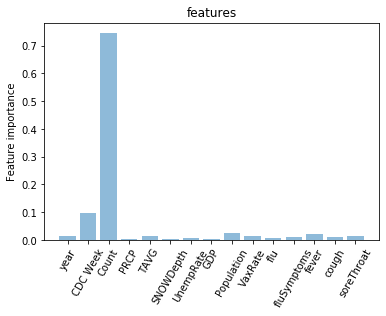

In [204]:
feature_importance = model_dt.feature_importances_
feature_importance_sorted = (np.sort(feature_importance))[::-1]
print("feature_importance = ", feature_importance)

y_pos = np.arange(len(features))
plt.bar(y_pos,feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, X_train.columns[:len(features)])
plt.ylabel('Feature importance')
plt.title('features')
plt.xticks(rotation=60)

plt.show()

Selecting best min sample leaf values and min sample split values for decision trees

In [205]:
min_samples_split_values = [int(i) for i in np.logspace(1, 12, num=10, base=2)]
min_samples_leaf_values = [int(i) for i in np.logspace(1, 12, num=10, base=2)]

def testTrees(x_train, x_test, y_train, y_test, split, leaf):
    '''
    Build a function that takes in tree hyperparams, data and returns accuracy on test data
    '''
    model = tree.DecisionTreeRegressor(criterion='mse',min_samples_leaf = leaf, min_samples_split = split)
    
    model.fit(x_train,y_train)
    test_p = model.predict(x_test)
    train_p = model.predict(x_train)
    
    test_r2_score = metrics.r2_score(y_test, test_p)
    train_r2_score = metrics.r2_score(y_train, train_p)

    return train_r2_score, test_r2_score
 
res = dict()
train_res = dict()
for s in min_samples_leaf_values:
    res[s] = list()
    train_res[s] = list()

for l in min_samples_leaf_values:
    for s in min_samples_split_values:
        train_r2_score, test_r2_score = testTrees(X_train_scaled, X_test_scaled, y_train, y_test, s, l)
        res[s].append(test_r2_score)
        train_res[s].append(train_r2_score)

#To get the best test score
maximum = max(res, key=res.get)
print("min sample leaf value = {}, sample split value = {} for the best R2 score = {}" .format(s ,res[maximum].index(max(res[maximum])) , max(res[maximum]) * 100))
#To get train value corresponding to best test result
print("Train R2 score corresponding to best test result = " ,train_res[maximum][res[maximum].index(max(res[maximum]))] * 100)

min sample leaf value = 4096, sample split value = 0 for the best R2 score = 79.41300369896473
Train R2 score corresponding to best test result =  95.33727964778478


We can see that the train R2 score is still higher than test score. This could be made better using ensember model

Text(0.5, 1.0, 'Holdout Accuracy by Hyperparameters')

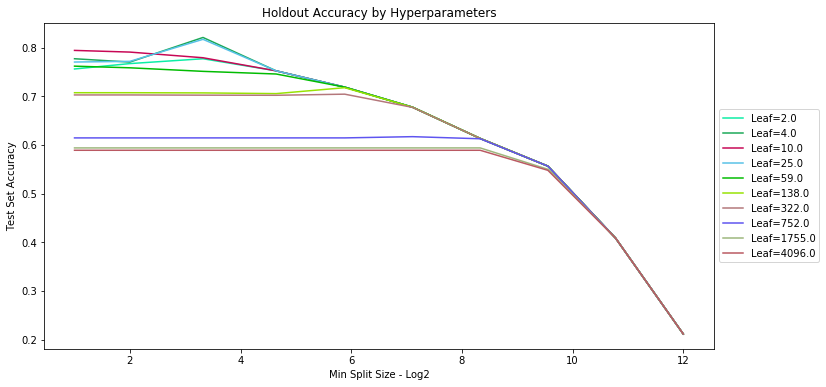

In [206]:
def r():
    return np.random.rand()

fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(111)

for l in min_samples_leaf_values:
    plt.plot(np.log2(min_samples_split_values), res[l], 
             color=(r(),r(),r()), label='Leaf={}'.format(np.floor(l)))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Min Split Size - Log2')
ax.set_ylabel('Test Set Accuracy')
plt.title('Holdout Accuracy by Hyperparameters')

In [207]:
def pred_model_rf(X_train, y_train, X_test, y_test):
  model_rf = ensemble.RandomForestRegressor(n_estimators = 500)
  model_rf.fit(X_train, y_train)
  y_train_pred_randomForest = model_rf.predict(X_test)
  Test_r2_score_randomForest = metrics.r2_score(y_test, y_train_pred_randomForest)
  print("R2 Score for Random Forest on testing data = {}" .format(Test_r2_score_randomForest * 100))

  y_train_pred_randomForest = model_rf.predict(X_train)
  Train_r2_score_randomForest = metrics.r2_score(y_train, y_train_pred_randomForest)
  print("R2 Score for Random Forest on training data = {}" .format(Train_r2_score_randomForest * 100))

  return model_rf


model_rf = pred_model_rf(X_train_scaled, y_train, X_test_scaled, y_test )

R2 Score for Random Forest on testing data = 89.18743133826584
R2 Score for Random Forest on training data = 98.34970463572084


In [208]:
#Hyperparameter tuning
def pred_model_rf_hp_tuning(X_train, y_train, X_test, y_test):
  best_test_Score = 0
  for estimator in range(100,1100,200):
    model_rf = ensemble.RandomForestRegressor(n_estimators = estimator)
    model_rf.fit(X_train, y_train)
    y_train_pred_randomForest = model_rf.predict(X_test)
    Test_r2_score_randomForest = metrics.r2_score(y_test, y_train_pred_randomForest)
    print("R2 Score for Random Forest on testing data = {} for estimator = {}" .format(Test_r2_score_randomForest * 100, estimator))

    y_train_pred_randomForest = model_rf.predict(X_train)
    Train_r2_score_randomForest = metrics.r2_score(y_train, y_train_pred_randomForest)
    print("R2 Score for Random Forest on training data = {}  for estimator = {}" .format(Train_r2_score_randomForest * 100, estimator))

    if best_test_Score < Test_r2_score_randomForest:
      optimum_estimator = estimator

  return optimum_estimator

optimum_estimator = pred_model_rf_hp_tuning(X_train_scaled, y_train, X_test_scaled, y_test )
print("Optimum Estimator Value= ",optimum_estimator )

R2 Score for Random Forest on testing data = 88.46344665985028 for estimator = 100
R2 Score for Random Forest on training data = 98.27981328054105  for estimator = 100
R2 Score for Random Forest on testing data = 88.79706104799789 for estimator = 300
R2 Score for Random Forest on training data = 98.32499392141283  for estimator = 300
R2 Score for Random Forest on testing data = 88.92171928402345 for estimator = 500
R2 Score for Random Forest on training data = 98.32719996673954  for estimator = 500
R2 Score for Random Forest on testing data = 88.89261485479368 for estimator = 700
R2 Score for Random Forest on training data = 98.32801061872489  for estimator = 700
R2 Score for Random Forest on testing data = 88.74314168648706 for estimator = 900
R2 Score for Random Forest on training data = 98.3667333289144  for estimator = 900
Optimum Estimator Value=  900


K fold Cross Validation

In [209]:
n_splits = 5
tscv = model_selection.TimeSeriesSplit(n_splits=n_splits)
split_number = 0
best_r2 = 0
r2_score_cv = []
for train_index, test_index in tscv.split(X):
  split_number += 1
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

  mm_scaler = sklearn.preprocessing.MinMaxScaler()
  X_train_cv_scaled = mm_scaler.fit_transform(X_train_cv)
  X_test_cv_scaled = mm_scaler.transform(X_test_cv)

  model_rf = sklearn.ensemble.RandomForestRegressor(n_estimators = optimum_estimator)
  model_rf.fit(X_train_cv_scaled, y_train_cv)
  y_train_pred_randomForest = model_rf.predict(X_test_cv_scaled)
  Test_r2_score_randomForest = metrics.r2_score(y_test_cv, y_train_pred_randomForest)
  print("R2 Score for Random Forest on testing data = {} for split number = {}" .format(Test_r2_score_randomForest * 100, split_number))

  y_train_pred_randomForest = model_rf.predict(X_train_cv_scaled)
  Train_r2_score_randomForest = metrics.r2_score(y_train_cv, y_train_pred_randomForest)
  print("R2 Score for Random Forest on training data = {} for split number = {}" .format(Train_r2_score_randomForest * 100, split_number))

  r2_score_cv.append(Test_r2_score_randomForest)

  if Test_r2_score_randomForest > best_r2:
    best_r2 = Test_r2_score_randomForest
    best_split_model = copy.deepcopy(model_rf)
    best_split_X_train = X_train_cv.copy()
    best_split_X_test = y_train_cv.copy()

print("R2 Score for the best Random Forest model on testing data = {}" .format(best_r2 * 100))

R2 Score for Random Forest on testing data = 70.00104774053644 for split number = 1
R2 Score for Random Forest on training data = 96.87169500603831 for split number = 1
R2 Score for Random Forest on testing data = 79.71724832766793 for split number = 2
R2 Score for Random Forest on training data = 97.16446383530591 for split number = 2
R2 Score for Random Forest on testing data = 86.82671139342712 for split number = 3
R2 Score for Random Forest on training data = 98.14172270938172 for split number = 3
R2 Score for Random Forest on testing data = 83.3439459748998 for split number = 4
R2 Score for Random Forest on training data = 98.39287062112271 for split number = 4
R2 Score for Random Forest on testing data = 92.29604571143754 for split number = 5
R2 Score for Random Forest on training data = 98.42930845930012 for split number = 5
R2 Score for the best Random Forest model on testing data = 92.29604571143754


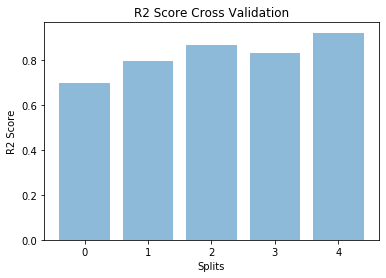

In [210]:
y_pos = np.arange(n_splits)
plt.bar(y_pos,r2_score_cv, align='center', alpha=0.5)
plt.xticks(y_pos,range(n_splits))
plt.ylabel('R2 Score')
plt.xlabel('Splits')
plt.title('R2 Score Cross Validation')

plt.show()